# Proyecto Final
by Matías Moré

In [32]:
#Librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette(["#024059", "#66D9CD", "#D9923B", "#BF726B", "#401F1F"])



## Dataset Fumadores

Este conjunto de datos consiste en datos biologicos de distintos individuos, recolectados con el objetivo de analizar los efectos y las señales del habito tabaquico. A travez de distintas caracteristicas de estudios de laboratorio como el estado sanguineo, urinario, hepatico, higienico y su relacion con el tabaquismo, se buscara encontrar patrones que determinen biologicamente los parametros a tener en cuenta para identificar a individuos fumadores. Teniendo en cuenta estos datos se realizara una comparacion de estas variables a fin de determinar su utilidad y trascendencia para lograr este fin.

Origen del dataset: https://www.kaggle.com/datasets/kukuroo3/body-signal-of-smoking?resource=download

### Code Acquisition

In [33]:
smoke_data = pd.read_csv("/workspaces/CoderPosta/Data/smoking.csv")
smoke_data

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55676,F,40,170,65,75.0,0.9,0.9,1.0,1.0,...,12.3,1.0,0.6,14.0,7.0,10.0,Y,1,Y,0
55688,55681,F,45,160,50,70.0,1.2,1.2,1.0,1.0,...,14.0,1.0,0.9,20.0,12.0,14.0,Y,0,Y,0
55689,55683,F,55,160,50,68.5,1.0,1.2,1.0,1.0,...,12.4,1.0,0.5,17.0,11.0,12.0,Y,0,N,0
55690,55684,M,60,165,60,78.0,0.8,1.0,1.0,1.0,...,14.4,1.0,0.7,20.0,19.0,18.0,Y,0,N,0


In [34]:
df = smoke_data.copy()
df["height(M)"] = df["height(cm)"] / 100
df["IMC"] = df["weight(kg)"] / (df["height(M)"] ** 2)

# Limpieza de Datos

### Nulos y Duplicados

Se verifica que no hay duplicados ni nulos.

In [35]:
print(df.isna().sum().sort_values())
print('Cant. de Duplicados ' ,df.duplicated().sum())

ID                     0
smoking                0
tartar                 0
dental caries          0
oral                   0
Gtp                    0
ALT                    0
AST                    0
serum creatinine       0
Urine protein          0
hemoglobin             0
LDL                    0
HDL                    0
height(M)              0
triglyceride           0
fasting blood sugar    0
relaxation             0
systolic               0
hearing(right)         0
hearing(left)          0
eyesight(right)        0
eyesight(left)         0
waist(cm)              0
weight(kg)             0
height(cm)             0
age                    0
gender                 0
Cholesterol            0
IMC                    0
dtype: int64
Cant. de Duplicados  0


### Agrupacion de Datos

In [36]:
df.dtypes

ID                       int64
gender                  object
age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)          float64
hearing(right)         float64
systolic               float64
relaxation             float64
fasting blood sugar    float64
Cholesterol            float64
triglyceride           float64
HDL                    float64
LDL                    float64
hemoglobin             float64
Urine protein          float64
serum creatinine       float64
AST                    float64
ALT                    float64
Gtp                    float64
oral                    object
dental caries            int64
tartar                  object
smoking                  int64
height(M)              float64
IMC                    float64
dtype: object

Datos  Categóricos

In [37]:
categoric_col = []
for col in df.columns:
	if (df[col].nunique()<10) and (df[col].dtype=='object'):
		categoric_col.append(col) 
  
print('Categoric Col {}'.format(categoric_col))

Categoric Col ['gender', 'oral', 'tartar']


Datos Continuos

In [38]:
Numeric=list(set(df.columns)- set(categoric_col))
Numeric= [x for x in Numeric if x!= "state"]
print('Cont Col {}'.format(Numeric))

Cont Col ['eyesight(left)', 'waist(cm)', 'Urine protein', 'serum creatinine', 'ALT', 'relaxation', 'age', 'IMC', 'hemoglobin', 'height(M)', 'height(cm)', 'hearing(left)', 'weight(kg)', 'triglyceride', 'Gtp', 'AST', 'ID', 'systolic', 'LDL', 'dental caries', 'fasting blood sugar', 'HDL', 'smoking', 'eyesight(right)', 'hearing(right)', 'Cholesterol']


### Analisis Univariado de Datos Categóricos

se define un barplot para cada una de las variables categóricas

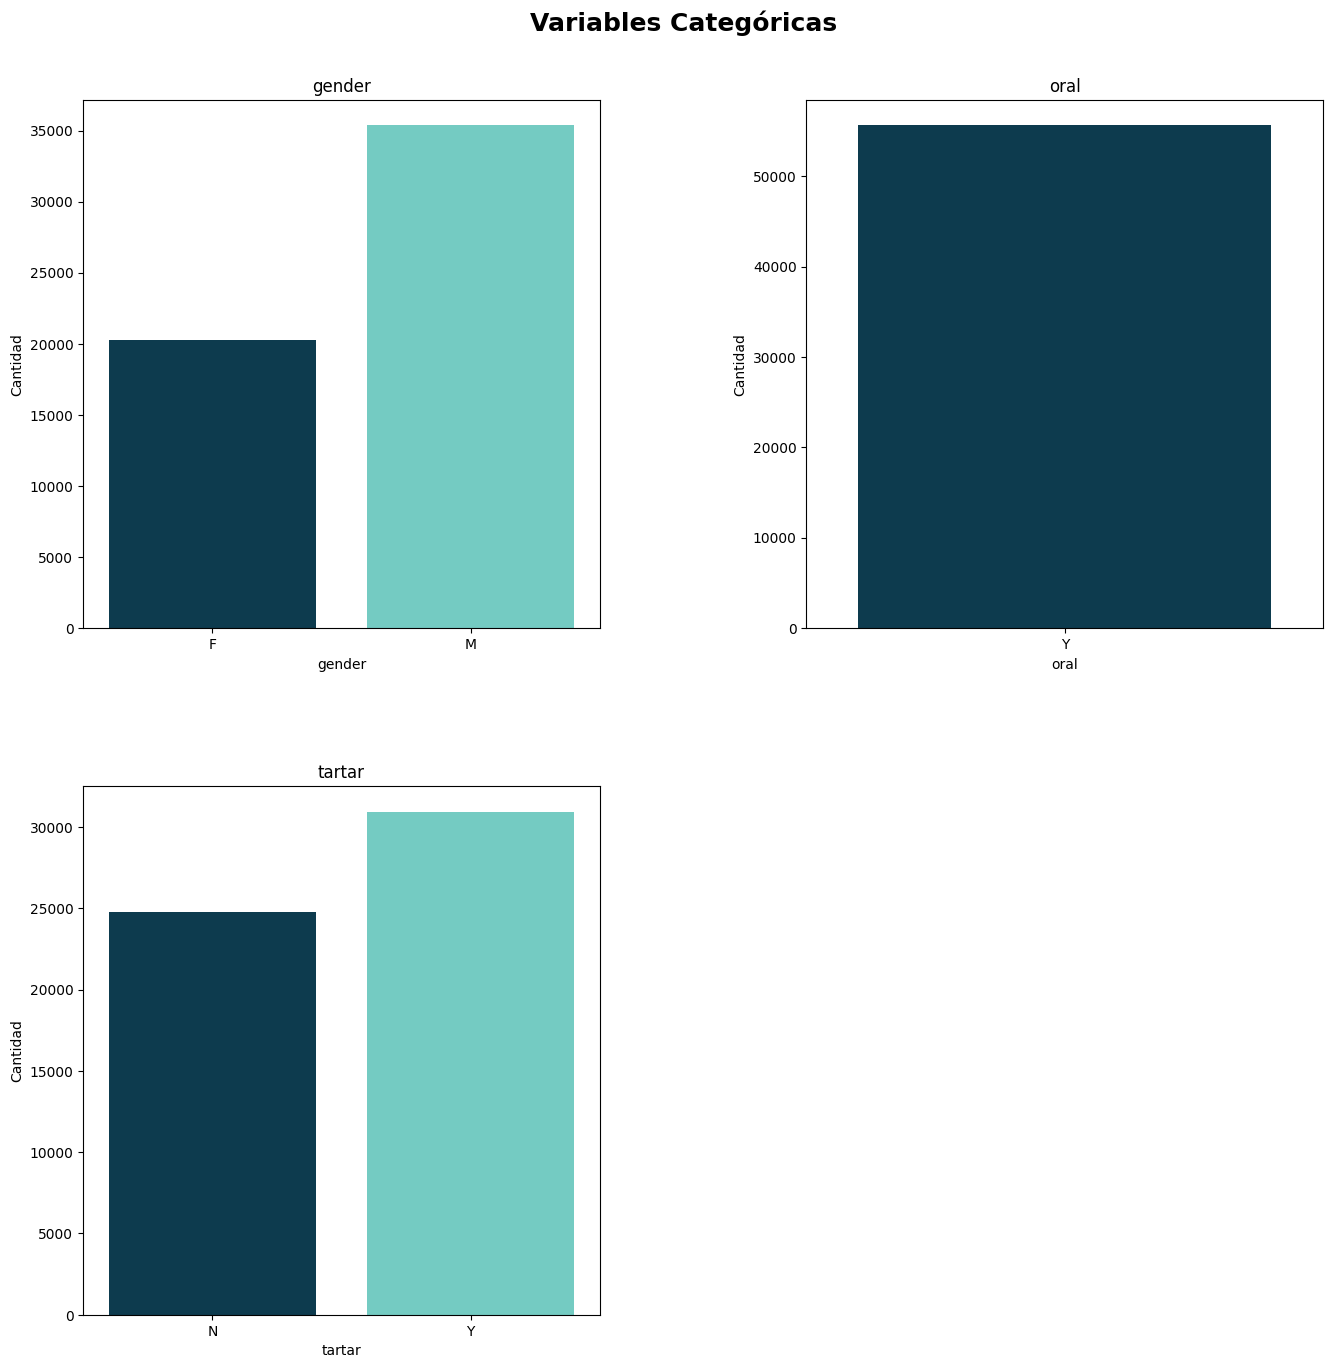

In [39]:
fig = plt.figure(figsize=[16,15])
fig.suptitle('Variables Categóricas', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.3, wspace=0.4);
for i , columns in enumerate(categoric_col):
    input = np.unique(df[columns] , return_counts = True)
    col= 'input'
    ax1 = fig.add_subplot(2, 2, i+1);
    ax1 = sns.barplot(x=list(eval(f'{col}[0]')), y=list(eval(f'{col}[1]')))
    plt.xlabel(columns)
    plt.ylabel("Cantidad")
    plt.title(columns)

Se identifica que la columna "oral" posee una sola variable unica.

In [40]:
df.nunique().sort_values()

oral                       1
dental caries              2
tartar                     2
hearing(left)              2
smoking                    2
hearing(right)             2
gender                     2
Urine protein              6
height(cm)                13
height(M)                 13
age                       14
eyesight(right)           17
eyesight(left)            19
weight(kg)                22
serum creatinine          38
relaxation                95
HDL                      126
systolic                 130
hemoglobin               145
IMC                      148
AST                      219
ALT                      245
fasting blood sugar      276
Cholesterol              286
LDL                      289
triglyceride             390
Gtp                      488
waist(cm)                566
ID                     55692
dtype: int64

Se elimina la variable "oral" por su irrelevancia para el modelo.

In [41]:
df.drop(labels="oral", axis=1, inplace=True)
df.head(5)

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking,height(M),IMC
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,1.0,0.7,18.0,19.0,27.0,0,Y,0,1.55,24.973985
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,1.0,0.6,22.0,19.0,18.0,0,Y,0,1.60,23.437500
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,1.0,1.0,21.0,16.0,22.0,0,N,1,1.70,20.761246
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,1.0,1.0,19.0,26.0,18.0,0,Y,0,1.65,25.711662
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,1.0,0.6,16.0,14.0,22.0,0,N,0,1.55,24.973985


### Análisis Bivariado de Datos Continuos

Se realiza un boxplot por cada variable continua para visualizar sus outlayers

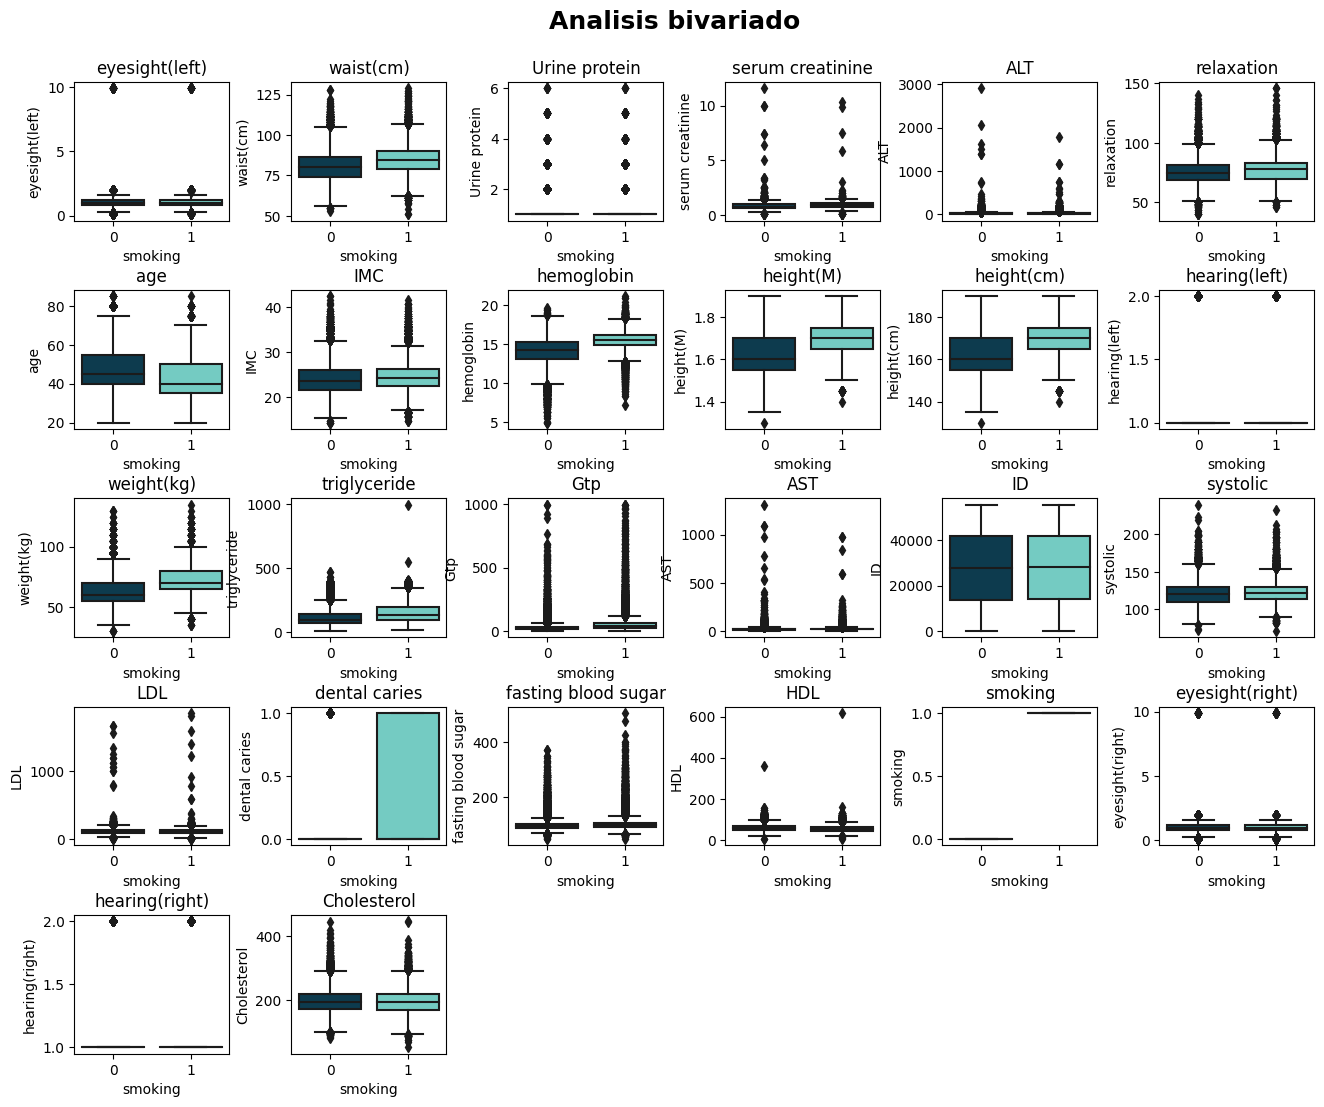

In [42]:
fig = plt.figure(figsize=[16,12])
fig.suptitle('Analisis bivariado', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(Numeric):
    a = fig.add_subplot(5, 6, i+1)
    a=sns.boxplot(x = 'smoking' , y =col , ax=a  , data = df )
    a.set_title(col)

Se delimitan los limites superior e inferior de cada boxplot

In [43]:
dict = {}
for col in Numeric:
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    IQR  = percentile75 - percentile25 
    upper_limit = percentile75 + 1.5 * IQR 
    lower_limit = percentile25 - 1.5 * IQR
    dict['upper_limit'+ '_' + col] = upper_limit
    dict['lower_limit'+ '_' + col] = lower_limit 

In [44]:
dict

{'upper_limit_eyesight(left)': 1.7999999999999998,
 'lower_limit_eyesight(left)': 0.20000000000000018,
 'upper_limit_waist(cm)': 106.0,
 'lower_limit_waist(cm)': 58.0,
 'upper_limit_Urine protein': 1.0,
 'lower_limit_Urine protein': 1.0,
 'upper_limit_serum creatinine': 1.2999999999999998,
 'lower_limit_serum creatinine': 0.5000000000000001,
 'upper_limit_ALT': 55.0,
 'lower_limit_ALT': -9.0,
 'upper_limit_relaxation': 100.0,
 'lower_limit_relaxation': 52.0,
 'upper_limit_age': 77.5,
 'lower_limit_age': 17.5,
 'upper_limit_IMC': 32.89871504157219,
 'lower_limit_IMC': 14.828672209624585,
 'upper_limit_hemoglobin': 19.1,
 'lower_limit_hemoglobin': 10.299999999999997,
 'upper_limit_height(M)': 1.8499999999999996,
 'lower_limit_height(M)': 1.4500000000000002,
 'upper_limit_height(cm)': 185.0,
 'lower_limit_height(cm)': 145.0,
 'upper_limit_hearing(left)': 1.0,
 'lower_limit_hearing(left)': 1.0,
 'upper_limit_weight(kg)': 105.0,
 'lower_limit_weight(kg)': 25.0,
 'upper_limit_triglyceride': 

Conteo de casos en outlayers

In [45]:
for col in Numeric:
    print('Total {} de pacientes con {} menor al limite inferior.'.format(len(df[df[col] < dict['lower_limit_' + col]] ) , col))
    print('Total {} de pacientes con {} mayor al limite superior.'.format(len(df[df[col] > dict['upper_limit_' + col]] ) , col))

Total 818 de pacientes con eyesight(left) menor al limite inferior.
Total 496 de pacientes con eyesight(left) mayor al limite superior.
Total 34 de pacientes con waist(cm) menor al limite inferior.
Total 462 de pacientes con waist(cm) mayor al limite superior.
Total 0 de pacientes con Urine protein menor al limite inferior.
Total 3093 de pacientes con Urine protein mayor al limite superior.
Total 1739 de pacientes con serum creatinine menor al limite inferior.
Total 1408 de pacientes con serum creatinine mayor al limite superior.
Total 0 de pacientes con ALT menor al limite inferior.
Total 3710 de pacientes con ALT mayor al limite superior.
Total 128 de pacientes con relaxation menor al limite inferior.
Total 578 de pacientes con relaxation mayor al limite superior.
Total 0 de pacientes con age menor al limite inferior.
Total 295 de pacientes con age mayor al limite superior.
Total 10 de pacientes con IMC menor al limite inferior.
Total 921 de pacientes con IMC mayor al limite superior

Se omiten del dataset aqueños datos por fuera de los limites del boxplot

In [46]:
for col in Numeric:
    df[col] = np.where(
        df[col] > dict['upper_limit_' + col], # si se comple
        dict['upper_limit_' + col], # poner limite superior (Q3+1.5IQR)
        np.where( # en caso contrario
            df[col] < dict['lower_limit_' + col], # si es menor al limite inferior
            dict['lower_limit_' + col], # poner el Q1-1.5IQR
            df[col]  # si no se cumple nada dejar quieto
        )
    )

Se verifica los cambios con el mismo gráfico.

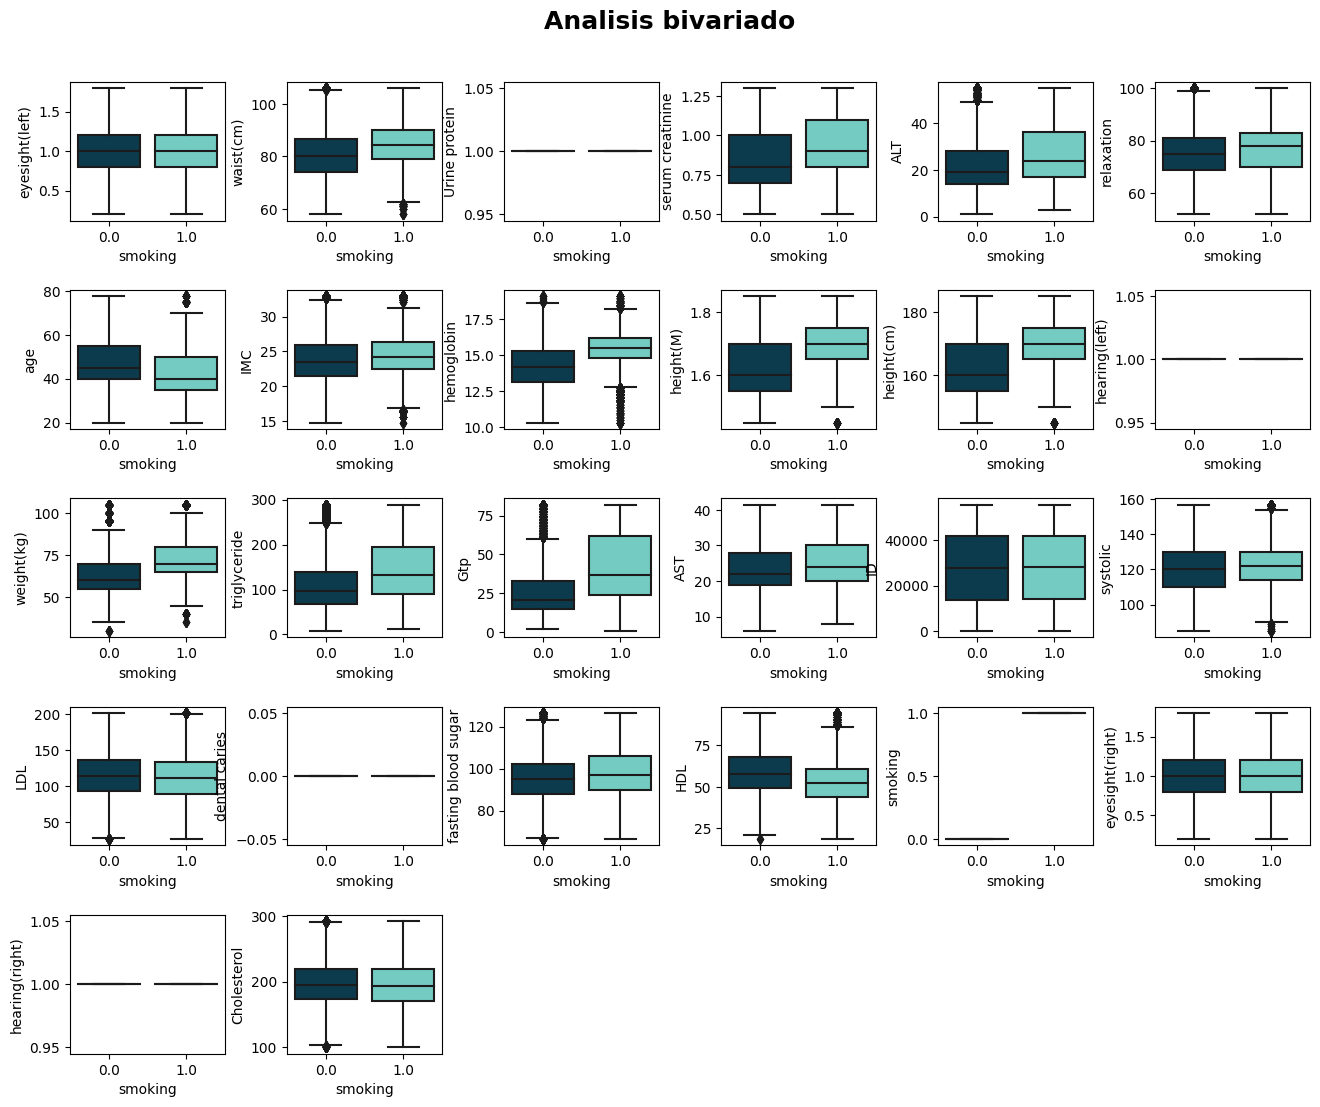

In [47]:
fig = plt.figure(figsize=[16,12])
fig.suptitle('Analisis bivariado', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(Numeric):
    a = fig.add_subplot(5, 6, i+1)
    a=sns.boxplot(x = 'smoking' , y =col , ax=a  , data = df )



Por lo que se observa en los resultados las columnas "urine protein", "hearing(right)", "hearing(left)"y "dental caries" no producen informacion valiosa para el modelo asi que se eliminan del "ds"

In [49]:
df.drop(labels=["Urine protein", "hearing(right)", "hearing(left)", "dental caries", "ID"], axis=1, inplace=True)
df

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,...,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,tartar,smoking,height(M),IMC
0,F,40.0,155.0,60.0,81.3,1.2,1.0,114.0,73.0,94.0,...,126.0,12.9,0.7,18.0,19.0,27.0,Y,0.0,1.55,24.973985
1,F,40.0,160.0,60.0,81.0,0.8,0.6,119.0,70.0,126.5,...,127.0,12.7,0.6,22.0,19.0,18.0,Y,0.0,1.60,23.437500
2,M,55.0,170.0,60.0,80.0,0.8,0.8,138.0,86.0,89.0,...,151.0,15.8,1.0,21.0,16.0,22.0,N,1.0,1.70,20.761246
3,M,40.0,165.0,70.0,88.0,1.5,1.5,100.0,60.0,96.0,...,202.0,14.7,1.0,19.0,26.0,18.0,Y,0.0,1.65,25.711662
4,F,40.0,155.0,60.0,86.0,1.0,1.0,120.0,74.0,80.0,...,107.0,12.5,0.6,16.0,14.0,22.0,N,0.0,1.55,24.973985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,F,40.0,170.0,65.0,75.0,0.9,0.9,110.0,68.0,89.0,...,118.0,12.3,0.6,14.0,7.0,10.0,Y,0.0,1.70,22.491349
55688,F,45.0,160.0,50.0,70.0,1.2,1.2,101.0,62.0,89.0,...,79.0,14.0,0.9,20.0,12.0,14.0,Y,0.0,1.60,19.531250
55689,F,55.0,160.0,50.0,68.5,1.0,1.2,117.0,72.0,88.0,...,63.0,12.4,0.5,17.0,11.0,12.0,N,0.0,1.60,19.531250
55690,M,60.0,165.0,60.0,78.0,0.8,1.0,133.0,76.0,107.0,...,146.0,14.4,0.7,20.0,19.0,18.0,N,0.0,1.65,22.038567
